Input file: `insurance.csv` dataset. Packed with information on health insurance customers.

## insurance.csv
| Column    | Data Type | Description                                                      |
|-----------|-----------|------------------------------------------------------------------|
| `age`       | int       | Age of the beneficiary.                                  |
| `gender`    | object    | male or female.             |
| `bmi`       | float     | Body mass index, a key indicator of body fat based on height and weight. |
| `children`  | int       | Number of childrens.              |
| `smoker`    | object    | Indicates whether the beneficiary smokes (yes or no).            |
| `region`    | object    | The beneficiary's residential area in the US, divided into four regions. |
| `charges`   | float     | Individual medical costs billed by health insurance.             |

In [261]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score

# Loading the insurance dataset
insurance_input = pd.read_csv('insurance.csv')
insurance_input.head()

,age,gender,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


In [262]:
# Get some info about the data
insurance_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   gender    1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB


In [263]:
# Clean the data
def clean_the_data(df: pd.DataFrame):
  
  df.dropna(inplace=True) # Remove missing values.
  
  insurance_input_cleaned = df.drop_duplicates() # Remove dublicates data

  print([insurance_input_cleaned.get("region").str.lower().unique()])

  insurance_input_cleaned.loc[:, "region"] = insurance_input_cleaned["region"].str.lower()

  print([insurance_input_cleaned.get("gender").unique()]) # Check all gender

  gender_mapping = {
      'female': 'female',
      'woman': 'female',
      'F': 'female',
      'male': 'male',
      'man': 'male',
      'M': 'male'
  }

  insurance_input_cleaned.loc[:, "gender"] = insurance_input_cleaned["gender"].map(gender_mapping)

  insurance_input_cleaned.head()

  print([insurance_input_cleaned.get("smoker").unique()]) # Check all gender

  insurance_input_cleaned.loc[:, "smoker"] = insurance_input_cleaned["smoker"].replace({"yes": True, "no": False})

  insurance_input_cleaned_pos = insurance_input_cleaned.apply(lambda x: x.abs() if np.issubdtype(x.dtype, np.number) else x)

  print(insurance_input_cleaned_pos.info())
  
  return insurance_input_cleaned_pos

In [264]:
def clear_charge_column(df: pd.DataFrame):
  # clean the charge column and make all column positivs
  
  df.loc[:, "charges"] = abs(df["charges"].str.strip("$").astype("float64"))
  return df

In [265]:
# Convert to numerical valuse

def convert_to_numerical(df: pd.DataFrame):
  df_num = pd.get_dummies(df, prefix=['region'], columns=['region'], dtype=int)
  df_num = df_num.drop(columns=['region_southeast'])

  df_num.loc[:, "smoker"] = df_num["smoker"].replace({"yes": True, "no": False})
  df_num['smoker'] = df_num['smoker' ].astype('int64')

  df_num['is_male'] = (df_num['gender'] == 'male').astype('int64')
  df_num = df_num.drop(columns=['gender'])

  df_num.dropna(inplace=True)

  return df_num

In [266]:
df_cleaned = clean_the_data(insurance_input)
df_cleaned = clear_charge_column(df_cleaned)
df_cleaned.sample(5)

[array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)]
[array(['female', 'male', 'woman', 'F', 'man', 'M'], dtype=object)]
[array(['yes', 'no'], dtype=object)]
<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1208 non-null   float64
 1   gender    1208 non-null   object 
 2   bmi       1208 non-null   float64
 3   children  1208 non-null   float64
 4   smoker    1208 non-null   object 
 5   region    1208 non-null   object 
 6   charges   1208 non-null   object 
dtypes: float64(3), object(4)
memory usage: 75.5+ KB
None


C:\Users\Ghaiath\AppData\Local\Temp\ipykernel_31696\2380745406.py:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_input_cleaned.loc[:, "smoker"] = insurance_input_cleaned["smoker"].replace({"yes": True, "no": False})


,age,gender,bmi,children,smoker,region,charges
558,35.0,female,34.105,3.0,True,northwest,39983.42595
1329,52.0,male,38.600,2.0,False,southwest,10325.206
768,64.0,female,39.700,0.0,False,southwest,14319.031
645,48.0,male,30.780,3.0,False,northeast,10141.1362
965,35.0,male,27.100,1.0,False,southwest,4746.344


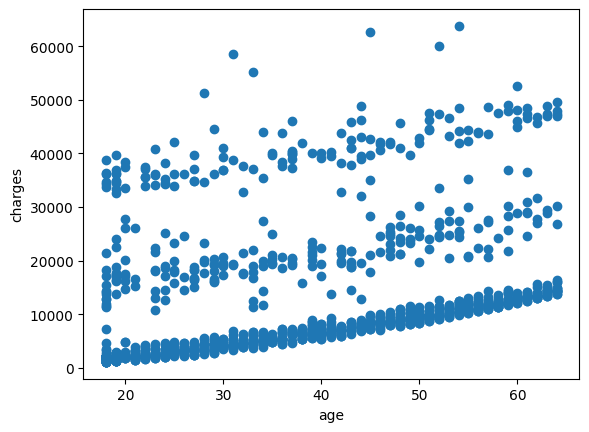

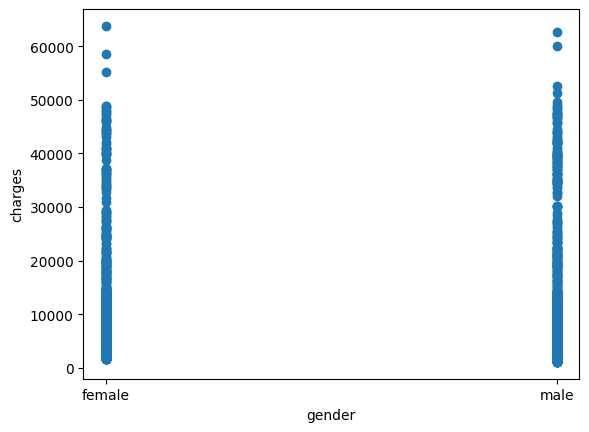

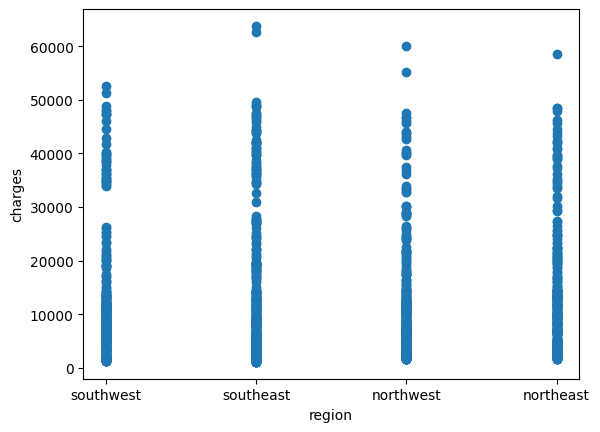

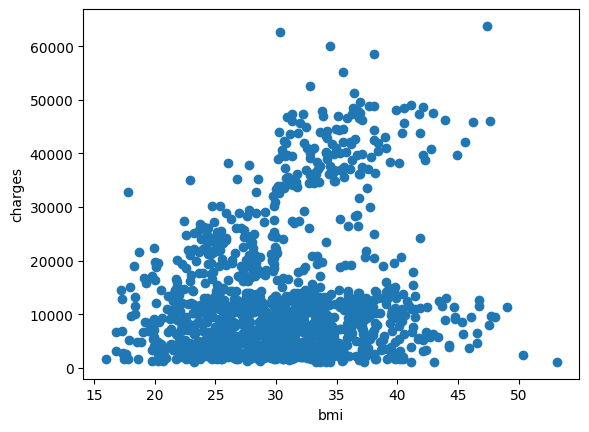

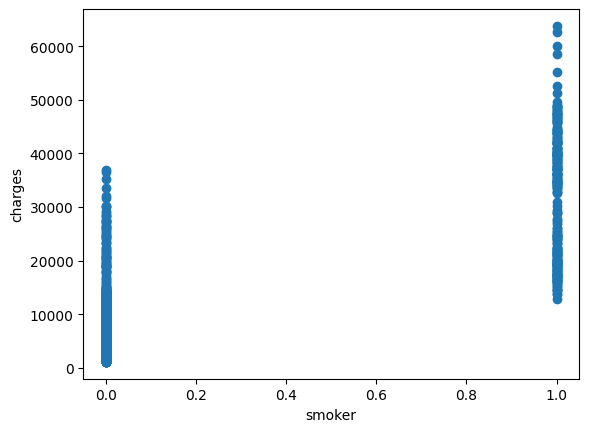

In [267]:
import matplotlib.pyplot as plt

# draw scatter plot between features and charges
df = df_cleaned.copy()

plt.scatter(df['age'], df['charges'])
plt.xlabel("age")
plt.ylabel("charges")
plt.show()

plt.scatter(df['gender'], df['charges'])
plt.xlabel("gender")
plt.ylabel("charges")
plt.show()

plt.scatter(df['region'], df['charges'])
plt.xlabel("region")
plt.ylabel("charges")
plt.show()

plt.scatter(df['bmi'], df['charges'])
plt.xlabel("bmi")
plt.ylabel("charges")
plt.show()

plt.scatter(df['smoker'], df['charges'])
plt.xlabel("smoker")
plt.ylabel("charges")
plt.show()

In [268]:
# Fitting to linearRegression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df_num = convert_to_numerical(df)

X = df_num.drop(columns=['charges'])
y = df_num['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2_score = r2_score(y_test, y_pred)

# Mean squared error
print(r2_score)

0.7049323160872817


C:\Users\Ghaiath\AppData\Local\Temp\ipykernel_31696\1469568614.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_num.loc[:, "smoker"] = df_num["smoker"].replace({"yes": True, "no": False})


In [269]:
val_df = pd.read_csv('validation_dataset.csv')

val_df_cleaned = clean_the_data(val_df)

val_df_num = convert_to_numerical(val_df_cleaned)

predictions = model.predict(val_df_num)

validation_data = val_df_num.copy()

validation_data['predicted_charges'] = predictions

validation_data.loc[validation_data['predicted_charges'] < 1000, 'predicted_charges'] = 1000

validation_data.head()

[array(['southeast', 'northeast', 'northwest', 'southwest'], dtype=object)]
[array(['female', 'male'], dtype=object)]
[array(['no', 'yes'], dtype=object)]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       50 non-null     float64
 1   gender    50 non-null     object 
 2   bmi       50 non-null     float64
 3   children  50 non-null     float64
 4   smoker    50 non-null     object 
 5   region    50 non-null     object 
dtypes: float64(3), object(3)
memory usage: 2.5+ KB
None


C:\Users\Ghaiath\AppData\Local\Temp\ipykernel_31696\2380745406.py:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_input_cleaned.loc[:, "smoker"] = insurance_input_cleaned["smoker"].replace({"yes": True, "no": False})
C:\Users\Ghaiath\AppData\Local\Temp\ipykernel_31696\1469568614.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_num.loc[:, "smoker"] = df_num["smoker"].replace({"yes": True, "no": False})


,age,bmi,children,smoker,region_northeast,region_northwest,region_southwest,is_male,predicted_charges
0,18.0,24.090000,1.0,0,0,0,0,0,1000.000000
1,39.0,26.410000,0.0,1,1,0,0,1,30956.214707
2,27.0,29.150000,0.0,1,0,0,0,1,27799.409607
3,71.0,65.502135,13.0,1,0,0,0,1,57194.414804
4,28.0,38.060000,0.0,0,0,0,0,1,6685.426312
